In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt


df_list = []
filename_list = []
for filename in os.listdir("data/cleaned_data"):
    df = pd.read_csv(f"data/cleaned_data/{filename}")
    filename_list.append(filename)
    df_list.append(df)
print(filename_list)

['WS23_L3_T1_P_16.csv', 'WS23_L2_T2_P_3.csv', 'WS23_L2_T1_P_4.csv', 'WS23_L1_T1_P_17.csv', 'WS23_L2_T2_P_2.csv', 'WS23_L1_T1_P_8.csv', 'WS23_L1_T1_P_21.csv', 'WS23_L1_T1_P_16.csv', 'WS23_L3_T1_P_11.csv', 'WS23_L3_T1_P_25.csv', 'WS23_L1_T1_P_5.csv', 'WS23_L3_T1_P_9.csv', 'WS23_L2_T1_P_14.csv', 'WS23_L2_T1_P_12.csv', 'WS23_L2_T2_P_4.csv', 'WS23_L2_T1_P_9.csv', 'WS23_L2_T1_P_13.csv', 'WS23_L1_T1_P_23.csv', 'WS23_L1_T1_P_14.csv', 'WS23_L2_T1_P_6.csv', 'WS23_L2_T1_P_16.csv', 'WS23_L2_T2_P_0.csv', 'WS23_L2_T1_P_2.csv', 'WS23_L1_T1_P_7.csv', 'WS23_L1_T1_P_11.csv', 'WS23_L3_T1_P_17.csv', 'WS23_L3_T1_P_4.csv', 'WS23_L2_T1_P_5.csv', 'WS23_L1_T1_P_12.csv', 'WS23_L3_T1_P_29.csv', 'WS23_L2_T1_P_8.csv', 'WS23_L1_T1_P_6.csv', 'WS23_L3_T1_P_33.csv', 'WS23_L2_T1_P_10.csv', 'WS23_L3_T1_P_32.csv', 'WS23_L3_T1_P_6.csv', 'WS23_L1_T1_P_4.csv', 'WS23_L3_T1_P_15.csv', 'WS23_L1_T1_P_15.csv', 'WS23_L3_T1_P_1.csv', 'WS23_L1_T1_P_9.csv', 'WS23_L3_T1_P_0.csv', 'WS23_L1_T1_P_3.csv', 'WS23_L3_T1_P_13.csv', 'WS23_L2_

# Find Force-Drop

plot idx: 4


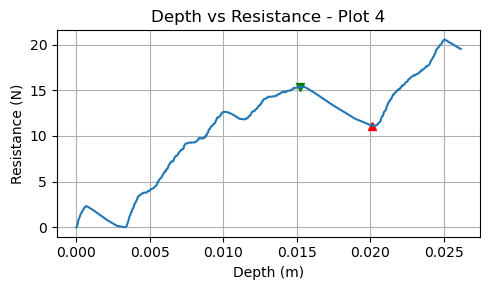

plot idx: 14


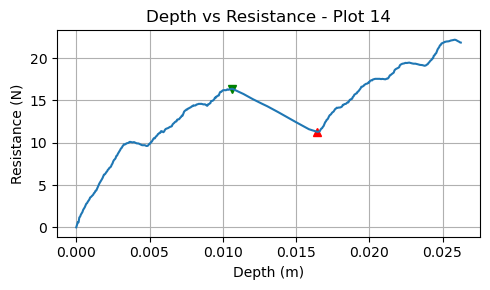

plot idx: 26


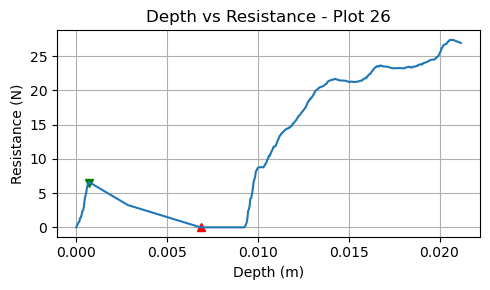

plot idx: 31


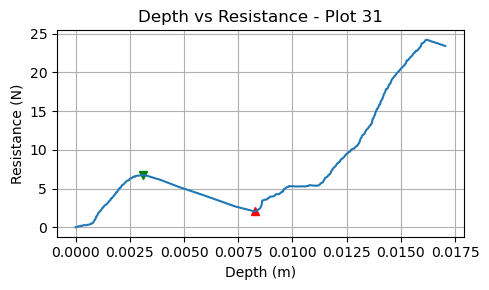

plot idx: 35


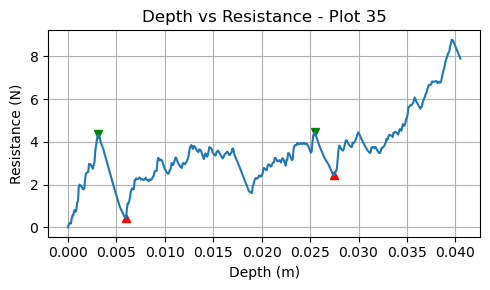

plot idx: 36


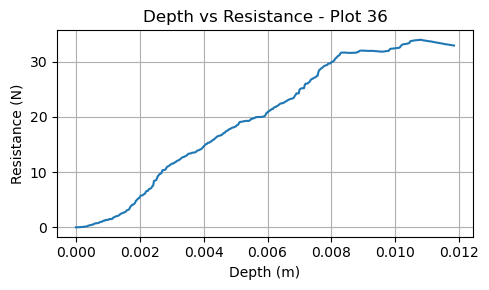

plot idx: 37


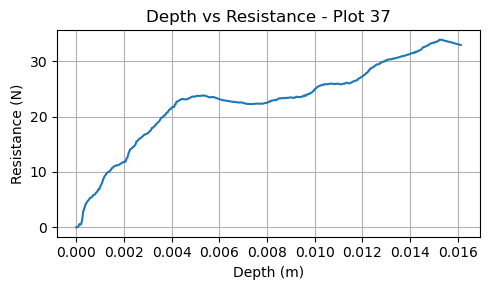

plot idx: 38


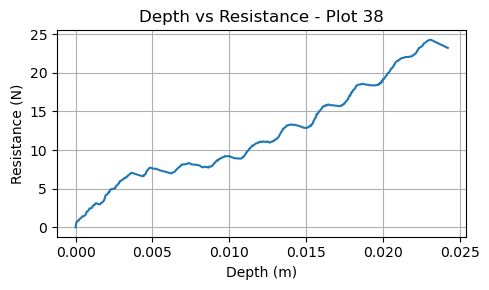

plot idx: 39


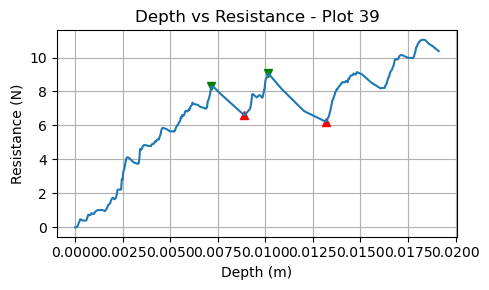

plot idx: 40


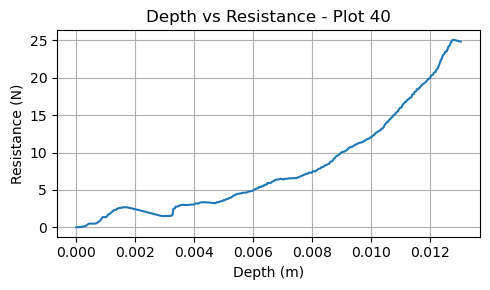

plot idx: 41


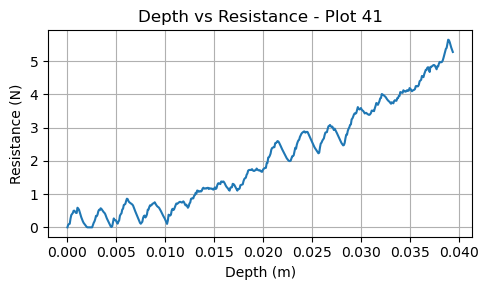

plot idx: 42


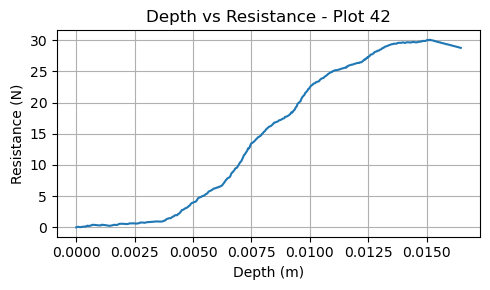

plot idx: 43


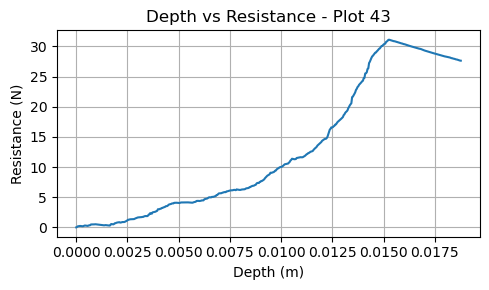

plot idx: 44


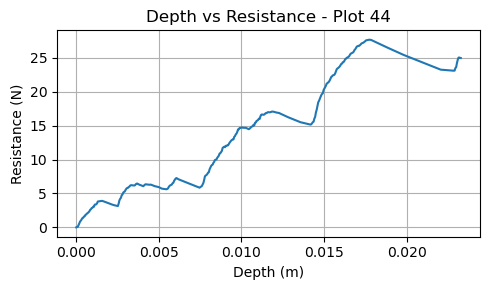

plot idx: 45


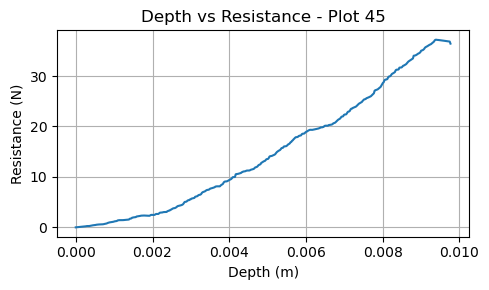

plot idx: 46


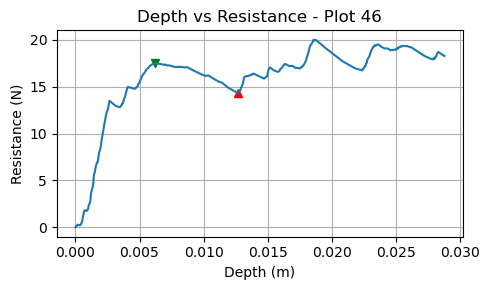

plot idx: 47


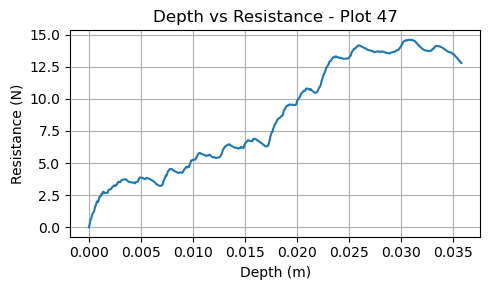

plot idx: 48


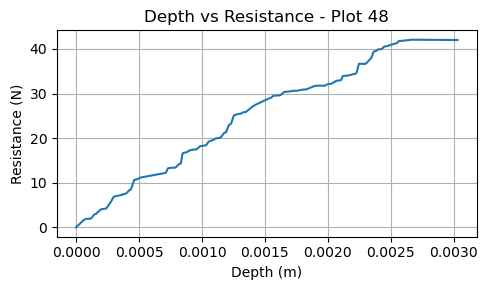

plot idx: 49


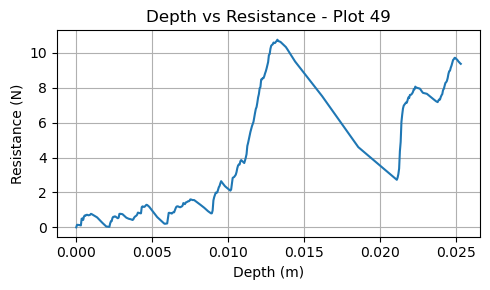

In [19]:
from typing import List, Tuple

def find_force_drop_subranges(df: pd.DataFrame, ratio: float):
    down_moves_subrange_list = []
    resistance_max = df['resistance'].max()
    curr_peak = 0
    curr_peak_idx = 0
    curr_trough_idx = 0
    for idx in range(1, len(df['resistance'])):

        if df['resistance'].iloc[idx] >= curr_peak and curr_trough_idx != curr_peak_idx:
            down_moves_subrange_list.append((curr_peak_idx, curr_trough_idx))

        if df['resistance'].iloc[idx] >= curr_peak:
            curr_peak = df['resistance'].iloc[idx]
            curr_peak_idx = idx
            curr_trough_idx = idx
        elif curr_peak - df['resistance'].iloc[idx] >= resistance_max * ratio and df['resistance'].iloc[idx] < df['resistance'].iloc[curr_trough_idx]: 
            curr_trough_idx = idx
            
    return down_moves_subrange_list

def find_largest_force_drop(df: pd.DataFrame, subrange_list: List[Tuple]):
    curr_max = 0
    for subrange_start, subrange_end in subrange_list:
        subrange_diff = df['resistance'].iloc[subrange_start] - df['resistance'].iloc[subrange_end]
        if subrange_diff > curr_max: 
            curr_max = subrange_diff
    return curr_max

def plot(df_list: List[pd.DataFrame], plot_idx_range: List[int], title: str = 'Depth vs Resistance'):
    for idx in plot_idx_range:
        print(f"plot idx: {idx}")
        df = df_list[idx]
        subranges = find_force_drop_subranges(df, 0.15)

        plt.figure(figsize=(5, 3))
        
        # Plot subrange start/end points
        for start_idx, end_idx in subranges:
            plt.plot(df['depth'].iloc[start_idx], df['resistance'].iloc[start_idx], marker='v', color='green')
            plt.plot(df['depth'].iloc[end_idx], df['resistance'].iloc[end_idx], marker='^', color='red')
        
        # Plot full depth vs resistance line
        plt.plot(df['depth'], df['resistance'],linestyle='-')
        plt.xlabel('Depth (m)')
        plt.ylabel('Resistance (N)')
        plt.title(f"{title} - Plot {idx}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot(df_list, plot_idx_range=[4,14,26,31,35]+list(range(36,50)))

# Choose Features

In [20]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def extract_simple_features(df):
    res = df["resistance"]
    dep = df["depth"]
    peaks = find_peaks(df["resistance"], distance=30)[0]

    return pd.DataFrame({
        # "res_mean": [res.mean()],
        # "peaks_value": peaks[0] if len(peaks) > 0 else 0,
        "overall_slope": [res.max() / dep.max()],
        "max_depth": [dep.max()],
        "max_resistance": [res.max()],
        "num_peaks": len(peaks),
        # "num_peaks": len(find_force_drop_subranges(df,0.05)),
        "force_drop": find_largest_force_drop(df, find_force_drop_subranges(df, 0.15)),
        # "force_drop_level": find_largest_force_drop(df, find_force_drop_subranges(df, 0.15))[1][0] # TODO this mess
        # "heterogeneity": heterogeneity(df, surface_fraction=0.2)
    })

# shape (n,m) where n is number of df and m is extracted feaetures
representation_list = []
for i, df in enumerate(df_list):
    extracted_simple_features = extract_simple_features(df)
    representation_list.append(extracted_simple_features)
print(f"example: {representation_list[0]}")


example:    overall_slope  max_depth  max_resistance  num_peaks  force_drop
0    2325.013184   0.014834       34.490185         10           0


# Correlation Matrix

In [21]:
representation_df  = pd.concat(representation_list, axis=0, ignore_index=True)
corr_matrix = representation_df.corr()
print(corr_matrix)

                overall_slope  max_depth  max_resistance  num_peaks  \
overall_slope        1.000000  -0.662962        0.581636  -0.649210   
max_depth           -0.662962   1.000000       -0.832672   0.632644   
max_resistance       0.581636  -0.832672        1.000000  -0.693144   
num_peaks           -0.649210   0.632644       -0.693144   1.000000   
force_drop          -0.214923   0.286716       -0.172859  -0.097564   

                force_drop  
overall_slope    -0.214923  
max_depth         0.286716  
max_resistance   -0.172859  
num_peaks        -0.097564  
force_drop        1.000000  


# Visualize Extracted Features Histograms

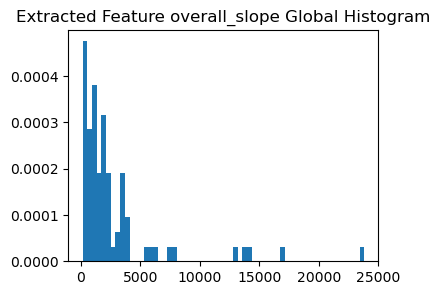

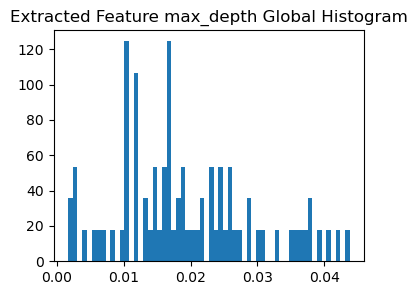

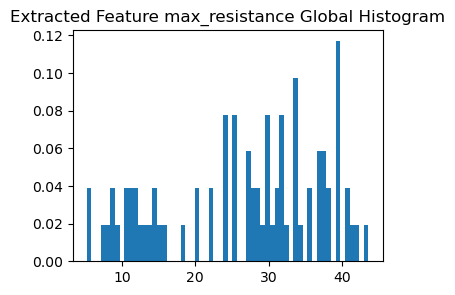

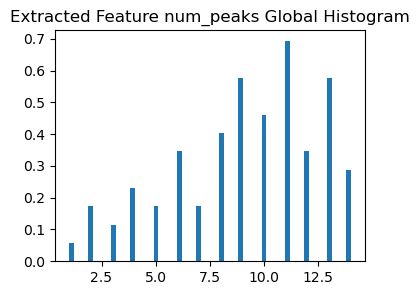

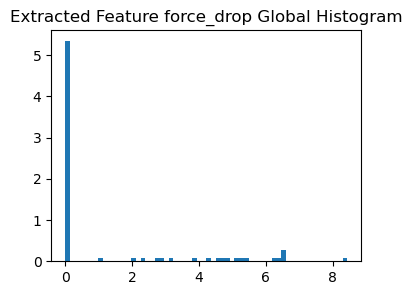

In [22]:
# representation_df  = pd.concat(representation_list, axis=0, ignore_index=True)
# # print(representation_df)
def plot_feature_dist(representation_df):
    for col in representation_df.columns:
        plt.figure(figsize=(4,3))
        plt.hist(representation_df[col], bins=60, density=True)
        plt.title(f"Extracted Feature {col} Global Histogram")
        plt.show()
plot_feature_dist(representation_df)

# Scale Features

   overall_slope  max_depth  max_resistance  num_peaks  force_drop
0       0.399236  -0.430733        0.729510   0.257508   -0.558874
1       0.386714  -0.446182        0.650763   0.556067   -0.558874
2      -0.377350   0.538862       -0.230094  -0.041052   -0.558874
3       2.188703  -1.651172        1.221120  -1.832408   -0.558874
4      -0.574385   0.672272       -0.577007  -0.041052    1.673589


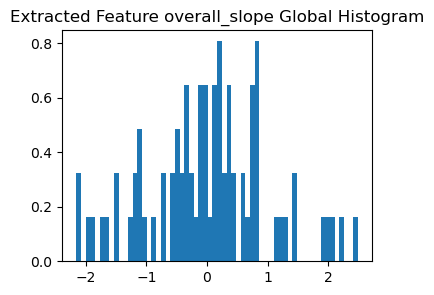

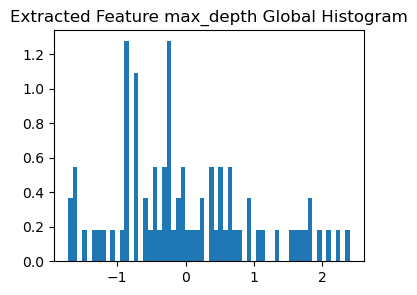

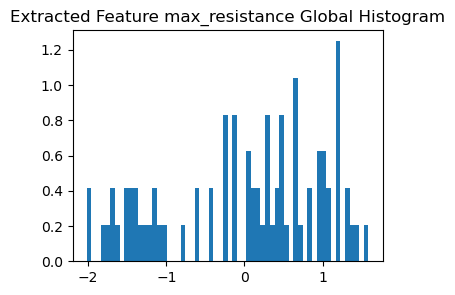

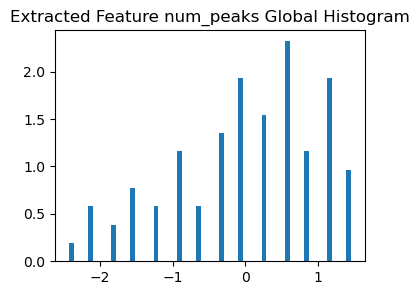

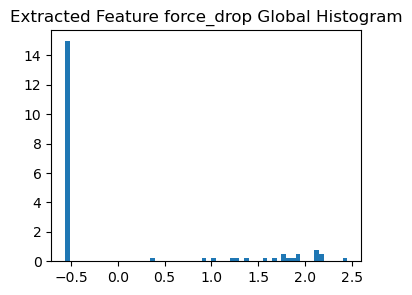

In [23]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def transform_features(df):
    df = df.copy()  # avoid modifying original
    # Apply cube root to 'slope'
    if "overall_slope" in df.columns: df['overall_slope'] = np.log(df['overall_slope'])
    if "peaks" in df.columns: df['peaks'] = np.log(df['peaks'] + 1)
    if "peaks_value" in df.columns: df["peaks_value"] = np.log(df['peaks_value'])
    if 'force_drop' in df.columns: df['force_drop'] = np.log(df['force_drop'] + 1)
    # if "yield_force" in df.columns: df['yield_force'] = df["yield_force"]
    # if "skew" in df.columns: df["skew"] = df["skew"] ** 1.1
    # if "kurtosis" in df.columns: df["kurtosis"] = np.sqrt(df["kurtosis"]) 
    # Standardize
    scaler = StandardScaler()
    df[df.columns] = scaler.fit_transform(df[df.columns])
    return df

scaled_representations = transform_features(representation_df)
print(scaled_representations[:5])
plot_feature_dist(scaled_representations)


# Add file names and if labels exist add them too

In [24]:
file_labels = ['biotic crust', 'biotic crust', 'biotic crust', 'biotic crust with surface nodules',
 'biotic crust with surface nodules', 'strata', 'strata', 'crusty ripple', 'strata', 'strata',
 'abiotic crust on top of strata', 'abiotic crust', 'strong biotic crust', 'abiotic crust',
 'abiotic crust', 'abiotic crust', 'abiotic crust', 'abiotic crust', 'strata', 'crust ripple',
 'crusty ripple', 'crusty ripple', 'crusty ripple', 'crust ripple',
 'crusty ripple', 'crusty ripple', 'crusty ripple', 'abiotic crust with surface nodule', 'crusty ripple',
 'crusty ripple', 'strata', 'strata with loose sand on top']

labled_files = ['WS23_L2_T1_P_3.csv', 'WS23_L2_T1_P_4.csv', 'WS23_L2_T1_P_6.csv', 'WS23_L2_T1_P_7.csv', 'WS23_L2_T1_P_8.csv',
 'WS23_L2_T1_P_11.csv', 'WS23_L2_T1_P_12.csv', 'WS23_L2_T1_P_13.csv', 'WS23_L2_T1_P_14.csv', 'WS23_L2_T1_P_15.csv',
 'WS23_L2_T1_P_16.csv', 'WS23_L3_T1_P_1.csv', 'WS23_L3_T1_P_3.csv', 'WS23_L3_T1_P_4.csv', 'WS23_L3_T1_P_5.csv',
 'WS23_L3_T1_P_6.csv', 'WS23_L3_T1_P_7.csv', 'WS23_L3_T1_P_8.csv', 'WS23_L3_T1_P_9.csv', 'WS23_L3_T1_P_10.csv',
 'WS23_L3_T1_P_11.csv', 'WS23_L3_T1_P_12.csv', 'WS23_L3_T1_P_13.csv', 'WS23_L3_T1_P_15.csv', 'WS23_L3_T1_P_16.csv',
 'WS23_L3_T1_P_17.csv', 'WS23_L3_T1_P_18.csv', 'WS23_L3_T1_P_19.csv', 'WS23_L3_T1_P_20.csv', 'WS23_L3_T1_P_21.csv', 
 'WS23_L3_T1_P_22.csv', 'WS23_L3_T1_P_23.csv']

scaled_representations['filenames'] = filename_list
label_map = dict(zip(labled_files, file_labels))
scaled_representations['y_labels'] = scaled_representations['filenames'].map(label_map)
print(scaled_representations[scaled_representations['filenames'] == 'WS23_L3_T1_P_23.csv'])

    overall_slope  max_depth  max_resistance  num_peaks  force_drop  \
62       0.141191  -0.223798        0.268808   0.556067   -0.558874   

              filenames                       y_labels  
62  WS23_L3_T1_P_23.csv  strata with loose sand on top  


# Concat and Save representation

In [25]:
scaled_representations.to_csv(f"data/features.csv", index=False)
print(scaled_representations)

    overall_slope  max_depth  max_resistance  num_peaks  force_drop  \
0        0.399236  -0.430733        0.729510   0.257508   -0.558874   
1        0.386714  -0.446182        0.650763   0.556067   -0.558874   
2       -0.377350   0.538862       -0.230094  -0.041052   -0.558874   
3        2.188703  -1.651172        1.221120  -1.832408   -0.558874   
4       -0.574385   0.672272       -0.577007  -0.041052    1.673589   
..            ...        ...             ...        ...         ...   
75       2.487856  -1.716791        1.192975  -2.429527   -0.558874   
76      -0.036923   0.687849        1.021691  -2.130968   -0.558874   
77      -0.372677  -0.690985       -1.379584   0.556067   -0.558874   
78      -1.872830   2.231655       -1.771156   1.153186    0.908308   
79      -0.471793   1.158234        0.066853  -1.235290    1.919260   

              filenames                           y_labels  
0   WS23_L3_T1_P_16.csv                      crusty ripple  
1    WS23_L2_T2_P_3.csv  